# Source: [Kaggle](https://www.kaggle.com/datasets/aiaiaidavid/ironman-703-race-data-between-2004-and-2020?resource=download)

In [38]:
my_time = 3*3600+8*60

In [45]:
(t.BikeTime > my_time).mean()

0.29290599053655925

<Axes: xlabel='BikeTime'>

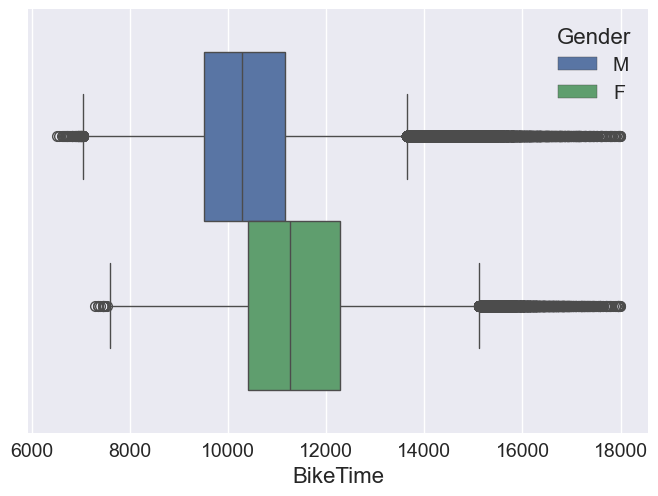

In [68]:
sns.boxplot(t,hue='Gender',x='BikeTime')
           

[Text(0.5, 1.0, '0.7899199056001422')]

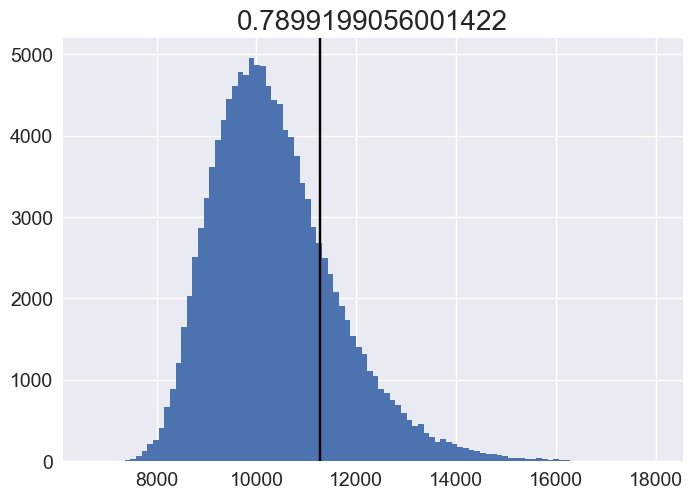

In [82]:
t.query("(AgeBand==35) & (Gender == 'M')").BikeTime.hist(bins=100)

plt.gca().axvline(my_time, color="k", label="My time (30th pctile)")
plt.gca().set(title=(t.query("(AgeBand==35) & (Gender == 'M')").BikeTime < my_time).mean())

In [110]:
t.columns

data = (
    (
        t.query("AgeBand != 00")
        .groupby(["Gender", "AgeBand"])
        .agg(
            bike=pd.NamedAgg("BikeTime", "mean"),
            swim=pd.NamedAgg("SwimTime", "mean"),
            run=pd.NamedAgg("RunTime", "mean"),
        )
        .reset_index()
        .astype({"AgeBand": int})
    )
    .assign(bike=lambda df: df.bike / 3600, swim=lambda df: df.swim / 60, run=lambda df: df.run / 3600)
    .melt(id_vars=["Gender", "AgeBand"], var_name="event", value_name="time")
)

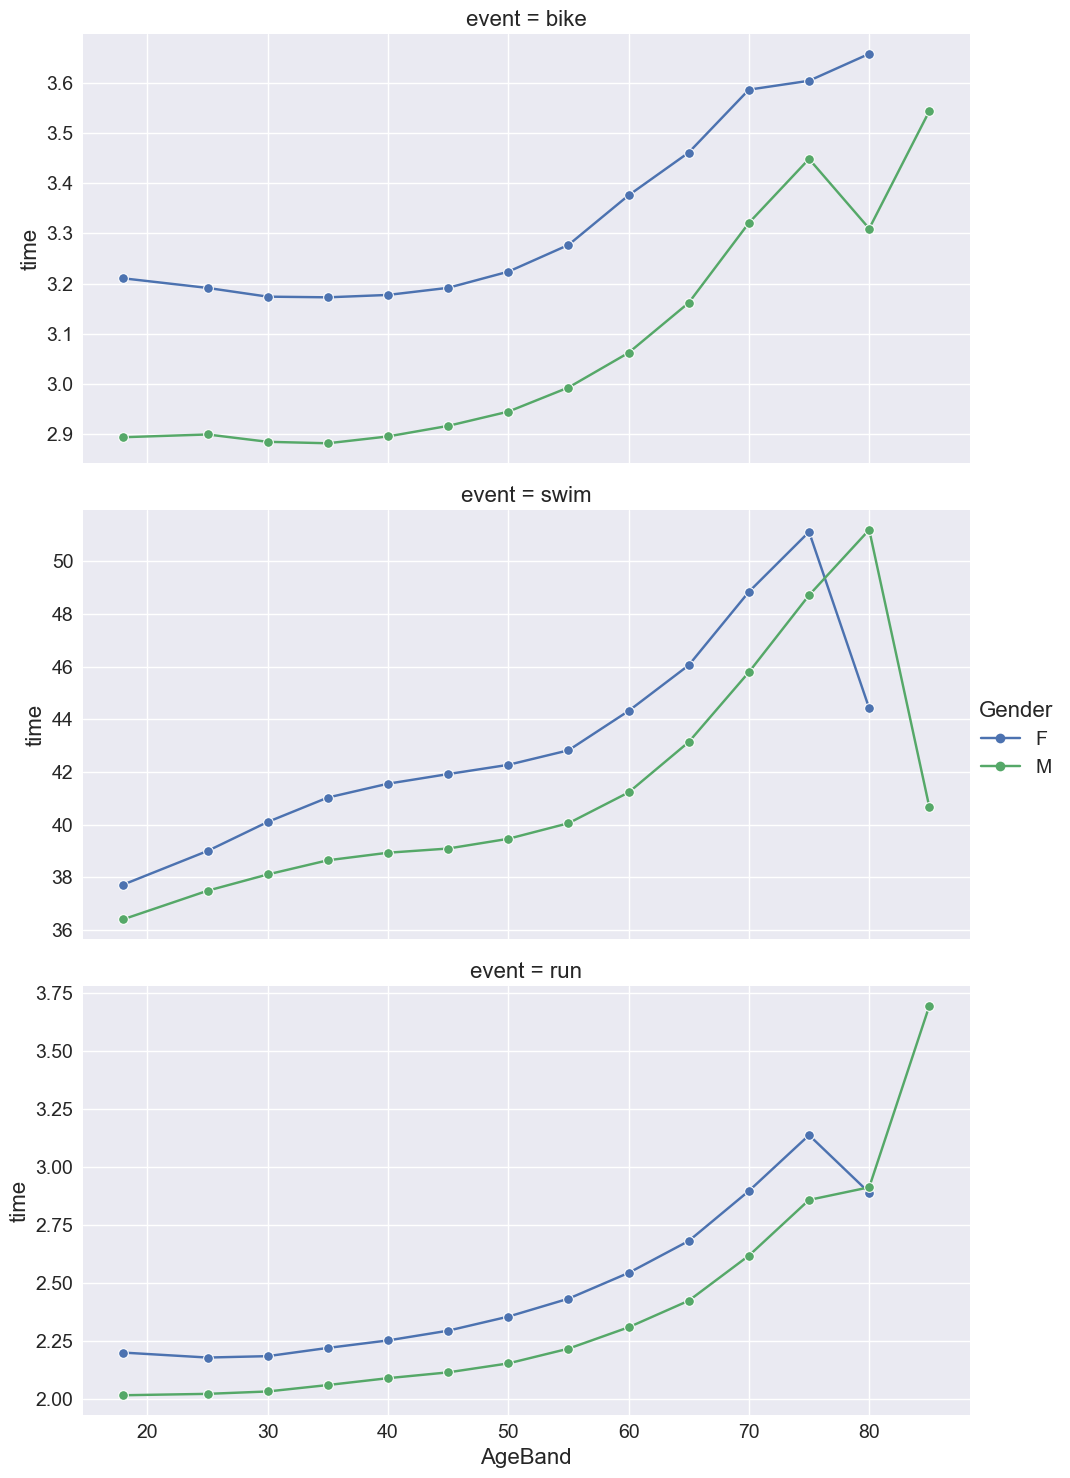

In [111]:
# ax =sns.boxplot(t,hue='AgeGroup',x='BikeTime')
sns.relplot(
    data,
    x="AgeBand",
    y="time",
    hue="Gender",
    kind="line",
    row='event',
    facet_kws={"sharey": False},
    aspect=2,
    marker='o'
)
# from labtools.util.visualization import move_legend_outside
# move_legend_outside(ax=ax)

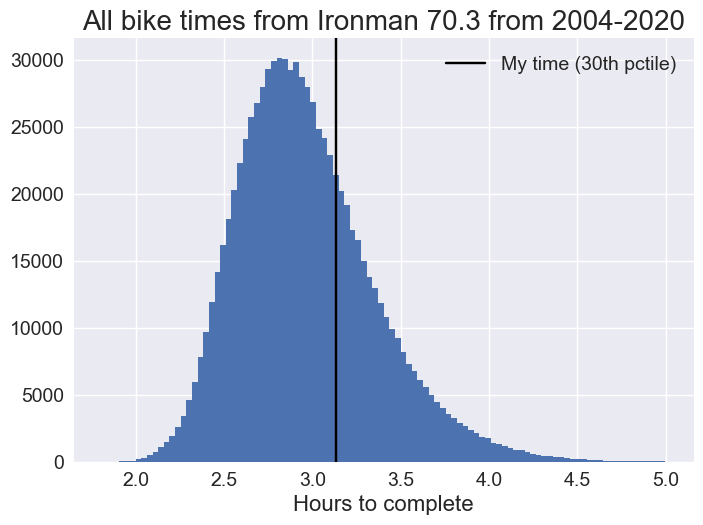

In [48]:
t = pd.read_csv("/Users/ahakso/Downloads/Half_Ironman_df6.csv")
(t.BikeTime / 3600).hist(bins=100)
plt.gca().axvline(my_time / 3600, color="k", label="My time (30th pctile)")
plt.gca().set(title="All bike times from Ironman 70.3 from 2004-2020",xlabel='Hours to complete')
plt.legend()